# ASSIGNMENT ON CLASSIFICATION

##### 1. Read the dataset to python environment

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
!pip install openpyxl


In [103]:
df= pd.read_excel(r"C:\Users\jubie\Downloads\iris.xls",index_col=0)
df

,SW,PL,PW,Classification
SL,,,,
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica


In [104]:
df.head()

,SW,PL,PW,Classification
SL,,,,
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
df.shape

(150, 4)

In [106]:
df.describe()

,SW,PL,PW
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SW              150 non-null    float64
 1   PL              150 non-null    float64
 2   PW              150 non-null    float64
 3   Classification  150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [108]:
df.isnull().sum() ## no missing values.so it is clean data

SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [109]:
df.dtypes

SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [110]:
df.groupby('Classification').size()


Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 2. Do the necessary pre-processing steps

In [111]:
df1=pd.get_dummies(df)#one hot encoding

In [112]:
df1.head()

,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
SL,,,,,,
5.1,3.5,1.4,0.2,1,0,0
4.9,3.0,1.4,0.2,1,0,0
4.7,3.2,1.3,0.2,1,0,0
4.6,3.1,1.5,0.2,1,0,0
5.0,3.6,1.4,0.2,1,0,0


#####  MinMax SCaling


In [113]:
from sklearn.preprocessing import MinMaxScaler
Scale=MinMaxScaler(feature_range=(0,1)).fit_transform(df1)
Scale

array([[0.625     , 0.06779661, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.41666667, 0.06779661, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.5       , 0.05084746, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.45833333, 0.08474576, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.06779661, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.79166667, 0.11864407, 0.125     , 1.        , 0.        ,
        0.        ],
       [0.58333333, 0.06779661, 0.08333333, 1.        , 0.        ,
        0.        ],
       [0.58333333, 0.08474576, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.375     , 0.06779661, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.45833333, 0.08474576, 0.        , 1.        , 0.        ,
        0.        ],
       [0.70833333, 0.08474576, 0.04166667, 1.        , 0.        ,
        0.        ],
       [0.58333333, 0

In [114]:
type(Scale)

numpy.ndarray

In [115]:
Scale = pd.DataFrame(Scale, columns=[df1])
Scale.head()

,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.666667,0.067797,0.041667,1.0,0.0,0.0


#### Spliting into test and train

C:\Users\jubie\AppData\Local\Temp\ipykernel_452\2792193405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


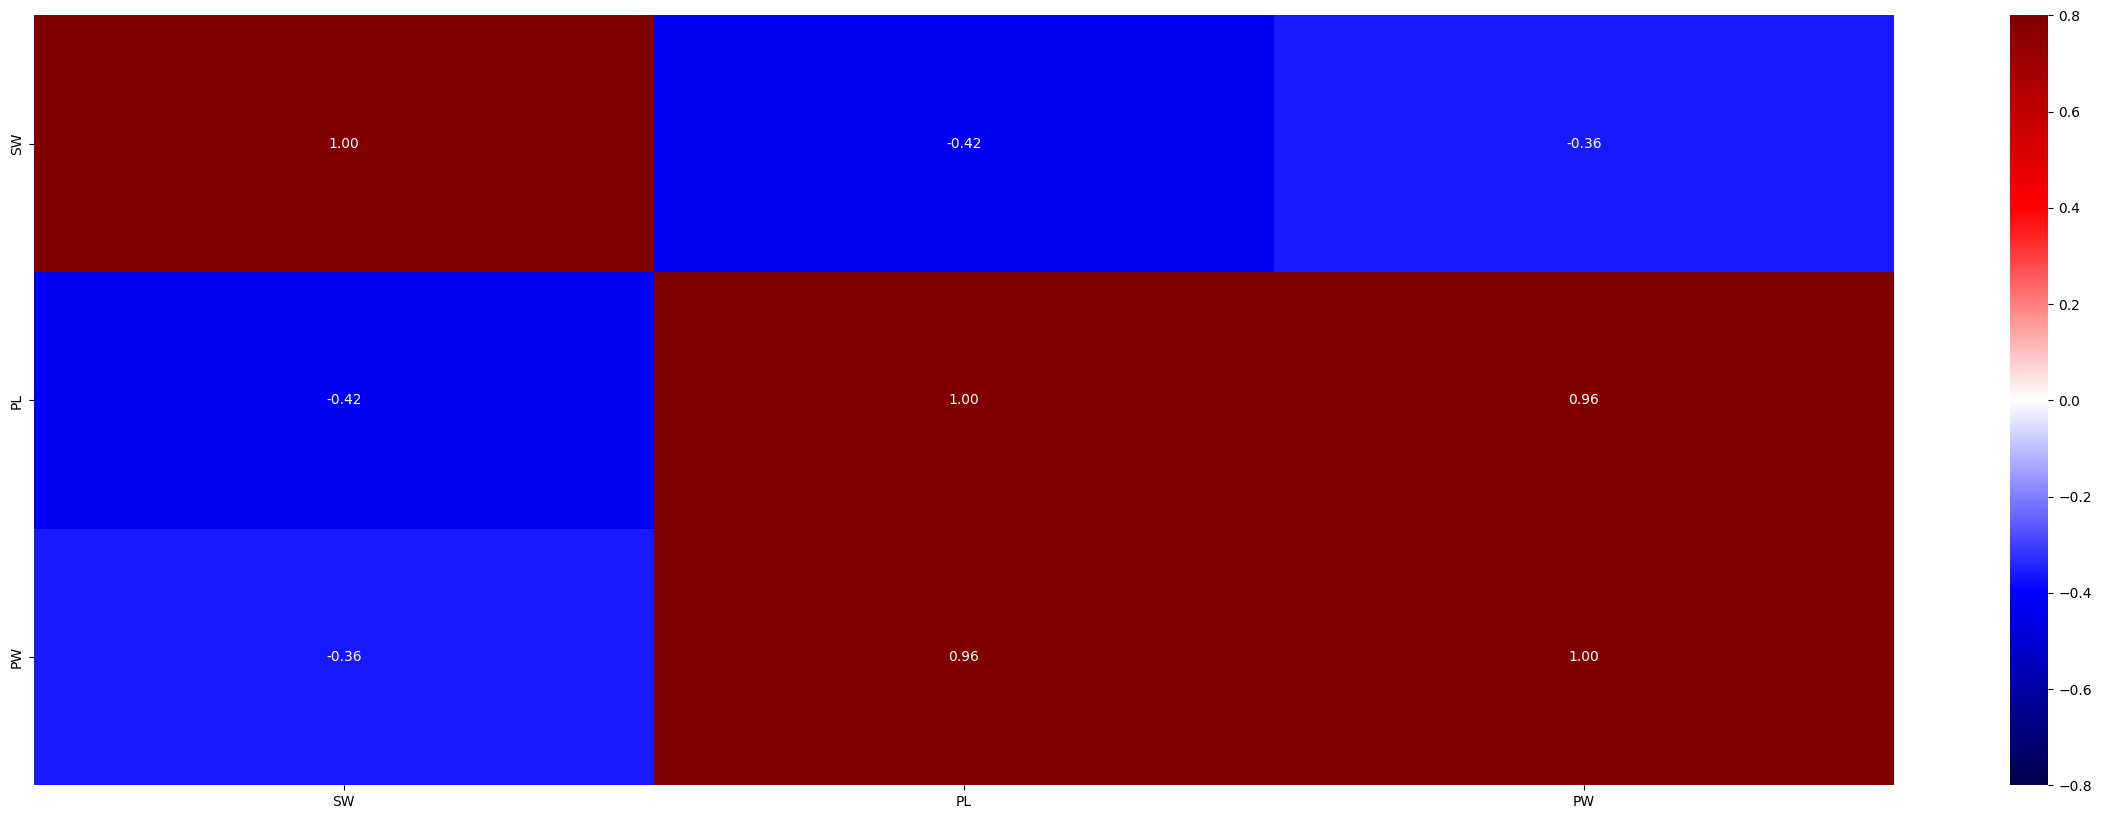

In [116]:
corr_matrix = df.corr()
plt.subplots(figsize= (30,10))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, vmin= -0.8, vmax= 0.8, cmap='seismic')
plt.show()

In [117]:
y = df['Classification']
X = df.drop('Classification',axis=1)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head(3)

,SW,PL,PW
SL,,,
5.0,3.6,1.4,0.2
5.2,4.1,1.5,0.1
5.8,2.7,5.1,1.9


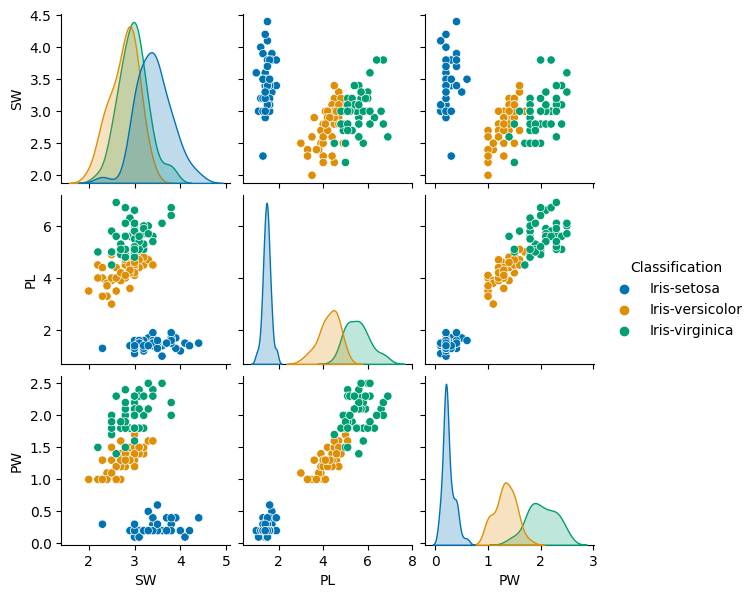

In [119]:
sns.pairplot(df,hue="Classification", height = 2, palette = 'colorblind');

## 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

### 1) LOGISTIC REGRESSION ML MODEL

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model1_lr = log_reg.fit(X_train, y_train)
y_pred_lr = model1_lr.predict(X_test)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [121]:
print(confusion_matrix(y_test, y_pred_lr))


[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [122]:
print(accuracy_score(y_test,y_pred_lr))

1.0


In [123]:
## recall_score and f1_score can,t find it using log regreesion

### 2) K-NN

In [124]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, y_train)
        y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(y_test,y_pred_knn)
        metric_k.append(acc)

In [125]:
metric_k

[0.9736842105263158,
 0.9736842105263158,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

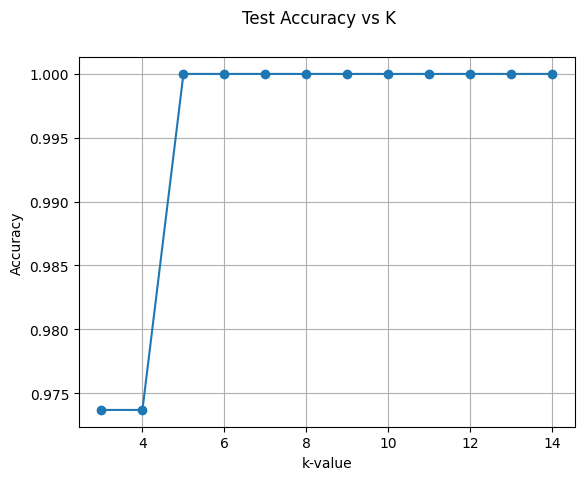

In [126]:
# plot a graph
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.suptitle("Test Accuracy vs K")
plt.grid()

In [127]:
knn = KNeighborsClassifier(n_neighbors=8)
model2 = knn.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))



[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


### 3) SVM MODEL

In [128]:
from sklearn.svm import SVC
#Linear SVM KERNEL;
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train, y_train)
y_pred_svm1 = svm_clf.predict(X_test)


print(confusion_matrix(y_test, y_pred_svm1))
print(accuracy_score(y_test, y_pred_svm1))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [129]:
#Radial Basis Function(RBF) SVM KERNEL;
svm_clf_rbf = SVC(kernel='rbf')
svm_model = svm_clf_rbf.fit(X_train, y_train)
y_pred_rbf = svm_clf_rbf.predict(X_test)


print(confusion_matrix(y_test, y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [130]:
#Polynomial SVM KERNEL:
svm_clf_p = SVC(kernel='poly', degree = 4)
svm_model = svm_clf_p.fit(X_train, y_train)
y_pred_p = svm_clf_p.predict(X_test)


print(confusion_matrix(y_test, y_pred_p))
print(accuracy_score(y_test, y_pred_p))


[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
0.9736842105263158


### 4) DECISION TREE 

In [131]:

from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, y_train)
y_pred_dtm = dtm_clf.predict(X_test)


print(confusion_matrix(y_test, y_pred_dtm))
print(accuracy_score(y_test, y_pred_dtm))



[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


### 5) RANDOM FOREST MODEL

In [132]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, y_train)
y_pred_rfm = rfm_clf.predict(X_test)


print(confusion_matrix(y_test, y_pred_rfm))
print(accuracy_score(y_test, y_pred_rfm))



[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


In [133]:
print('Comparing accuracy scores for different models')
print('Accuracy score for Logistic-regression',accuracy_score(y_test,y_pred_lr))
print('Accuracy score for kNN',accuracy_score(y_test,y_pred_knn))
print('Accuracy score for SVM Linear',accuracy_score(y_test, y_pred_svm1))
print('Accuracy score for SVM RBF',accuracy_score(y_test, y_pred_rbf))
print('Accuracy score for SVM Polynomial',accuracy_score(y_test, y_pred_p))
print('Accuracy score for Random Forest Model',accuracy_score(y_test, y_pred_rfm))
print('Accuracy score for Decision Tree',accuracy_score(y_test, y_pred_dtm))

Comparing accuracy scores for different models
Accuracy score for Logistic-regression 1.0
Accuracy score for kNN 1.0
Accuracy score for SVM Linear 1.0
Accuracy score for SVM RBF 1.0
Accuracy score for SVM Polynomial 0.9736842105263158
Accuracy score for Random Forest Model 1.0
Accuracy score for Decision Tree 1.0


#### We should be pretty confident now since most of our models achieved a test accuracy of 100%!



